**Table of contents**<a id='toc0_'></a>    
- 1. [load pkl files](#toc1_)    
- 2. [concatenate df's](#toc2_)    
- 3. [Exploratory Analysis](#toc3_)    
- 4. [Histograms](#toc4_)    
  - 4.1. [ch2](#toc4_1_)    
  - 4.2. [Ch1](#toc4_2_)    
  - 4.3. [Ch0](#toc4_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

Presently, this notebook only contains wf from ch2

In [1]:
# import sys
# import os
import numpy as np
import pandas as pd
import pickle
# from scipy.stats import chisquare
# from scipy.integrate import simpson

# import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
# from matplotlib.ticker import AutoMinorLocator
# from matplotlib.ticker import FormatStrFormatter

# from termcolor import colored
# from tqdm.notebook import tqdm

In [3]:
np.set_printoptions(formatter={'float': lambda x: f"{x:10.4g}"})

In [4]:
%matplotlib ipympl 

# 1. <a id='toc1_'></a>[load pkl files](#toc0_)

In [5]:
# all_clean_catalogues = []
# for run_number in run_number_ls:
#     all_clean_catalogues.append(f'clean_catalogue_run000{run_number}.pkl')

In [6]:
# selected_clean_catalogue_path = os.path.join(output_folder, all_clean_catalogues[3])
# selected_clean_dict = pickle.load(open(selected_fit_catalogue_path, 'rb'))
# selected_clean_dict #['ch2']

In [7]:
output_folder = '/home/sarthak/my_projects/argset/output_folder'
# output_folder = '/home/sarthak/my_projects/argset/backup'

In [8]:
run_number_ls = [52, 53, 54, 61, 62, 63]
# run_number_ls = [52, 61]

In [9]:
all_fit_catalogues = []
for run_number in run_number_ls:
    all_fit_catalogues.append(f'{output_folder}/fit_catalogue_run000{run_number}.pkl')

In [10]:
all_fit_catalogues

['/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00052.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00053.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00054.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00061.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00062.pkl',
 '/home/sarthak/my_projects/argset/output_folder/fit_catalogue_run00063.pkl']

In [11]:
fit_dict_52 = pickle.load(open( all_fit_catalogues[0], 'rb'))

In [12]:
fit_dict_53 = pickle.load(open( all_fit_catalogues[1], 'rb'))

In [13]:
fit_dict_54 = pickle.load(open( all_fit_catalogues[2], 'rb'))

In [14]:
fit_dict_61 = pickle.load(open( all_fit_catalogues[3], 'rb'))

In [15]:
fit_dict_62 = pickle.load(open( all_fit_catalogues[4], 'rb'))

In [16]:
fit_dict_63 = pickle.load(open( all_fit_catalogues[4], 'rb'))

# 2. <a id='toc2_'></a>[concatenate df's](#toc0_)

In [17]:
fit_dict_ls = [fit_dict_52, fit_dict_53, fit_dict_54, fit_dict_61, fit_dict_62, fit_dict_63]
ch_str_ls = ['ch0', 'ch1', 'ch2']

fit_catalogue = {}
for ch_x in ch_str_ls:
    fit_catalogue_x = []
    for fit_dict in fit_dict_ls:
        fit_catalogue_x.append(fit_dict[ch_x])
    fit_catalogue[ch_x] = pd.concat(fit_catalogue_x, ignore_index=True)

# 3. <a id='toc3_'></a>[Exploratory Analysis](#toc0_)

the ratio of good fit waveforms to clean forms

In [18]:
(fit_catalogue['ch0'][fit_catalogue['ch0']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch0']).shape[0]

1.9585761151642755e-05

In [19]:
(fit_catalogue['ch1'][fit_catalogue['ch1']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch1']).shape[0]

0.9136811906042676

In [20]:
(fit_catalogue['ch2'][fit_catalogue['ch2']['chisqr']< 2.0]).shape[0]/(fit_catalogue['ch2']).shape[0]

0.8942607473762789

How many times fit failed to converge?

In [21]:
fit_catalogue['ch0']['fit_param'].isnull().sum()

247

In [22]:
fit_catalogue['ch1']['fit_param'].isnull().sum()

16

In [23]:
fit_catalogue['ch2']['fit_param'].isnull().sum()

6

Drop NA rows

In [24]:
for ch_x in ch_str_ls:
    fit_catalogue[ch_x] = fit_catalogue[ch_x].dropna()

In [25]:
# sanity check: dropna works!
fit_catalogue['ch0']['fit_param'].isnull().sum()

0

# 4. <a id='toc4_'></a>[Histograms](#toc0_)

In [26]:
param_dict = {}
for ch_x in ch_str_ls:
    t0_ls = []
    sigma_ls = []
    tau_ls = []
    scale_ls = []
    fit_param_x = {}
    for loop_index in fit_catalogue[ch_x].index.values:
        loop_fit_param = fit_catalogue[ch_x].loc[loop_index]['fit_param']
        t0_ls.append(loop_fit_param[0])
        sigma_ls.append(loop_fit_param[1])
        tau_ls.append(loop_fit_param[2])
        scale_ls.append(loop_fit_param[3])
    fit_param_x['t0'] = t0_ls
    fit_param_x['sigma'] = sigma_ls
    fit_param_x['tau'] = tau_ls
    fit_param_x['scale'] = scale_ls
    param_dict[ch_x] = fit_param_x

In [27]:
n_param = fit_catalogue['ch0']['fit_param'][0].shape[0]

## 4.1. <a id='toc4_1_'></a>[ch2](#toc0_)

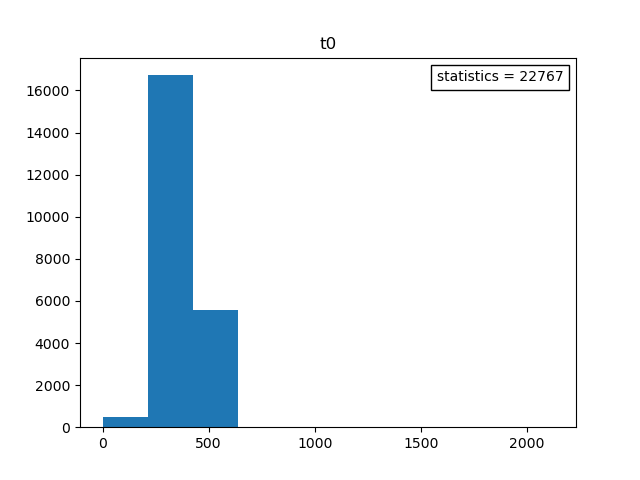

In [28]:
ch_x = ch_str_ls[2]

In [ ]:
plt.close(1)
plt.figure(1)
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['t0'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.hist(param_dict[ch_x]['t0'])
plt.title('t0')
plt.show()

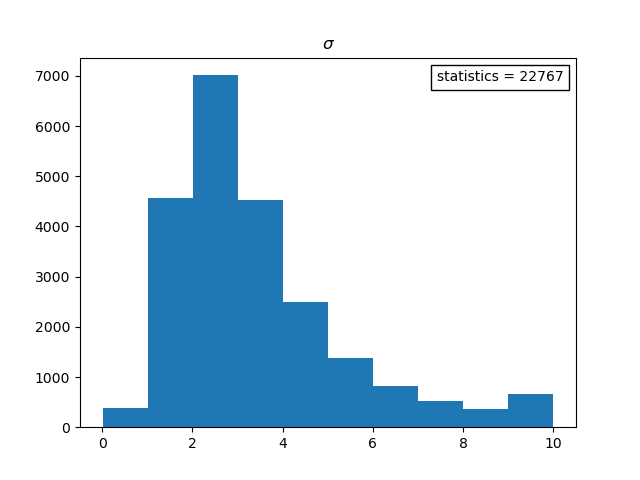

In [29]:
plt.close(2)
plt.figure(2)
plt.hist(param_dict[ch_x]['sigma']) #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['sigma'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\sigma$')
plt.show()

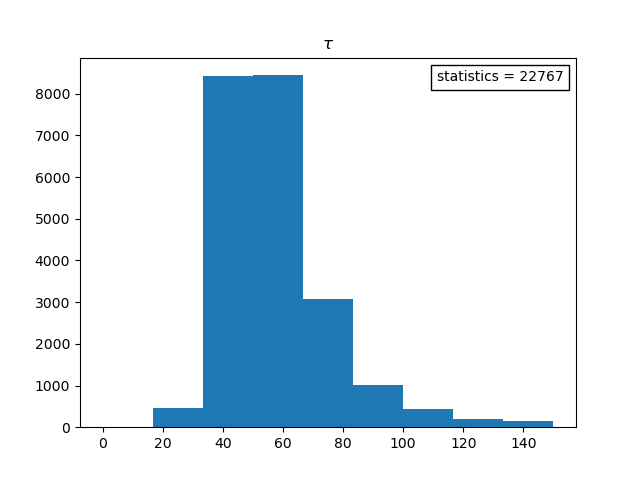

In [30]:
plt.close(3)
plt.figure(3)
plt.hist(param_dict[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['tau'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\tau$')
plt.show()

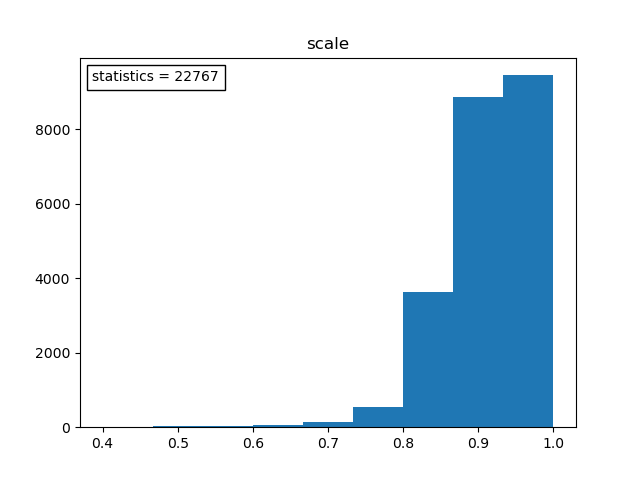

In [31]:
plt.close(4)
plt.figure(4)
plt.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
                                       loc='upper left')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('scale')
plt.show()

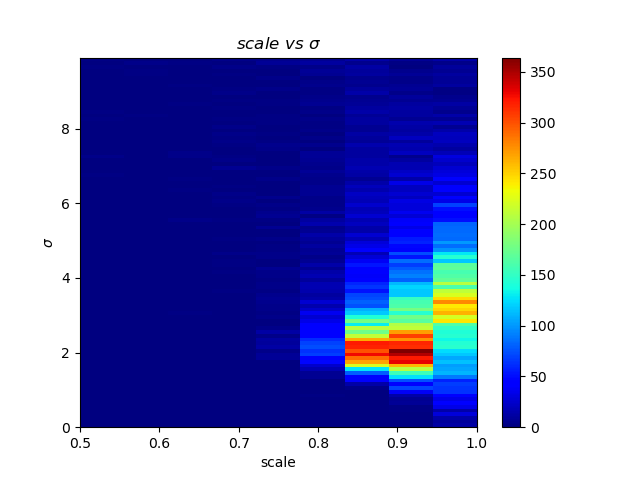

In [32]:
plt.close(5)
plt.figure(5)
plt.hist2d(param_dict[ch_x]['scale'], param_dict[ch_x]['sigma'], bins = [np.linspace(0.5, 1.0, 10), np.arange(0., 10., 0.10)], cmap='jet')
plt.xlabel('scale')
plt.ylabel('$\sigma$')
plt.colorbar()
plt.title('$scale\ vs \ \\sigma$');

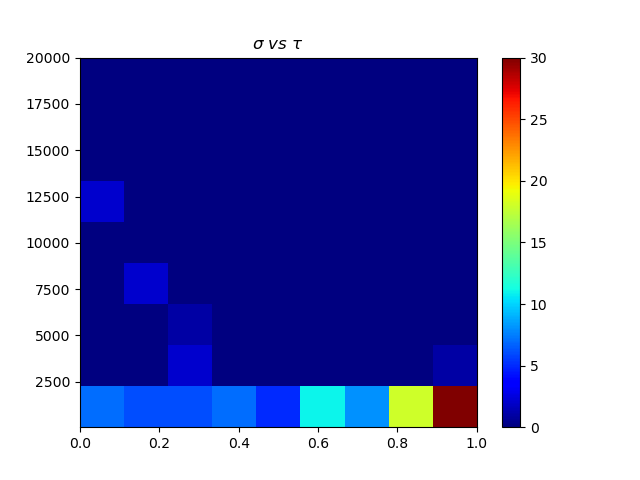

In [33]:
plt.close(6)
plt.figure(6)
plt.hist2d(param_dict[ch_x]['sigma'], param_dict[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\sigma \ vs \ \\tau $');

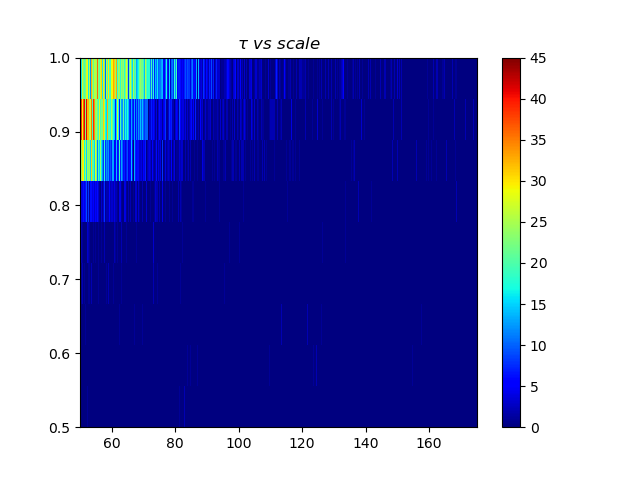

In [34]:
plt.close(7)
plt.figure(7)
plt.hist2d(param_dict[ch_x]['tau'], param_dict[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\tau \ vs \ scale $');

## 4.2. <a id='toc4_2_'></a>[ch1](#toc0_)

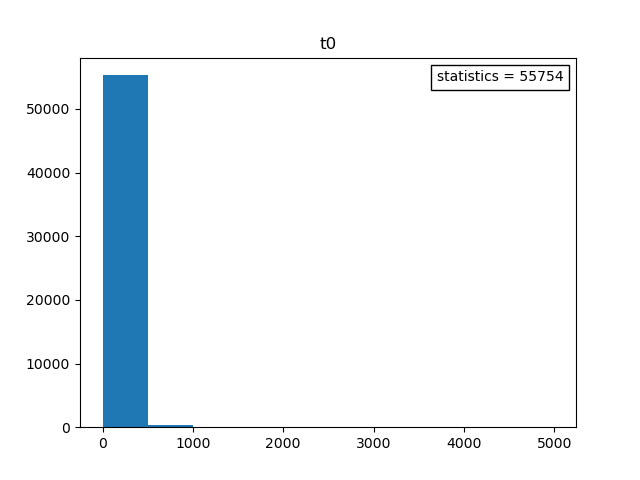

In [37]:
ch_x = ch_str_ls[1]

In [ ]:
plt.close(8)
plt.figure(8)
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['t0'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.hist(param_dict[ch_x]['t0'])
plt.title('t0')
plt.show()

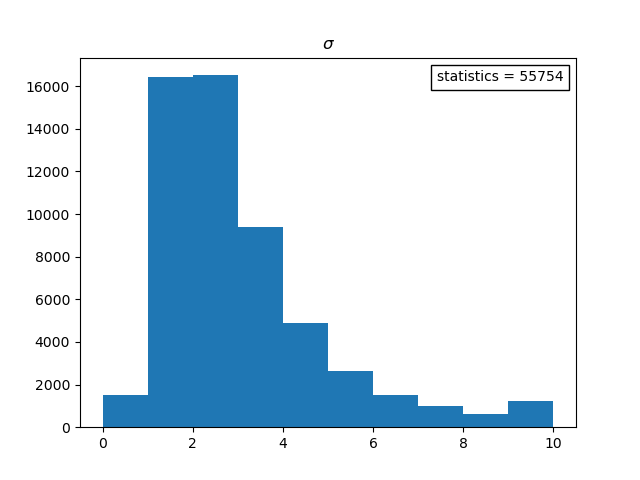

In [38]:
plt.close(9)
plt.figure(9)
plt.hist(param_dict[ch_x]['sigma']) #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['sigma'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\sigma$')
plt.show()

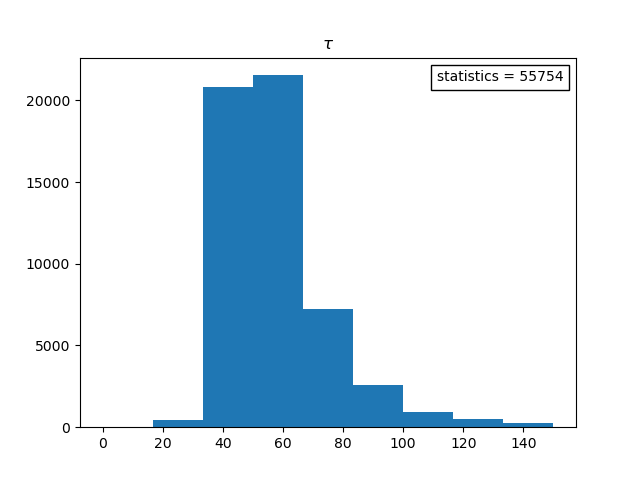

In [39]:
plt.close(10)
plt.figure(10)
plt.hist(param_dict[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['tau'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\tau$')
plt.show()

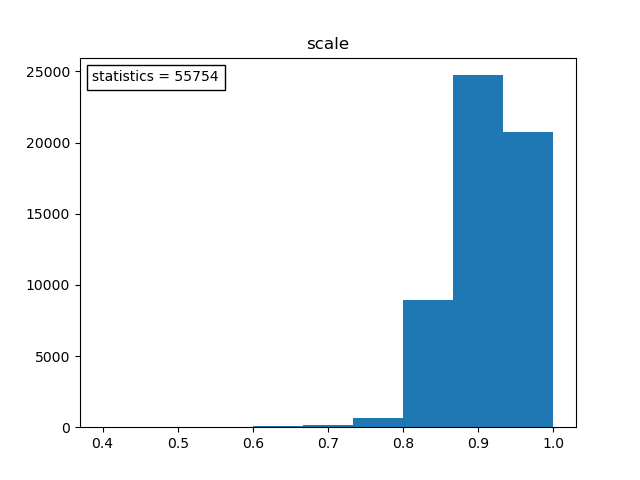

In [40]:
plt.close(11)
plt.figure(11)
plt.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
                                       loc='upper left')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('scale')
plt.show()

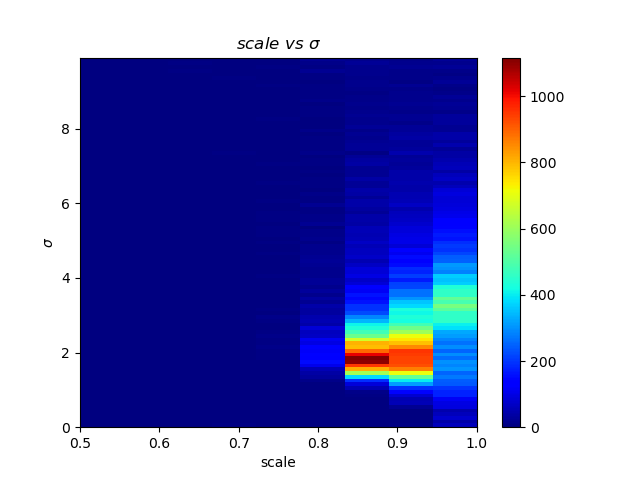

In [41]:
plt.close(12)
plt.figure(12)
plt.hist2d(param_dict[ch_x]['scale'], param_dict[ch_x]['sigma'], bins = [np.linspace(0.5, 1.0, 10), np.arange(0., 10., 0.10)], cmap='jet')
plt.xlabel('scale')
plt.ylabel('$\sigma$')
plt.colorbar()
plt.title('$scale\ vs \ \\sigma$');

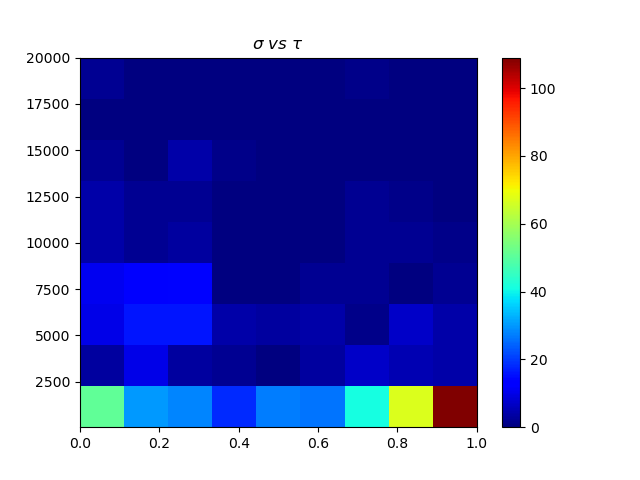

In [42]:
plt.close(13)
plt.figure(13)
plt.hist2d(param_dict[ch_x]['sigma'], param_dict[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\sigma \ vs \ \\tau $');

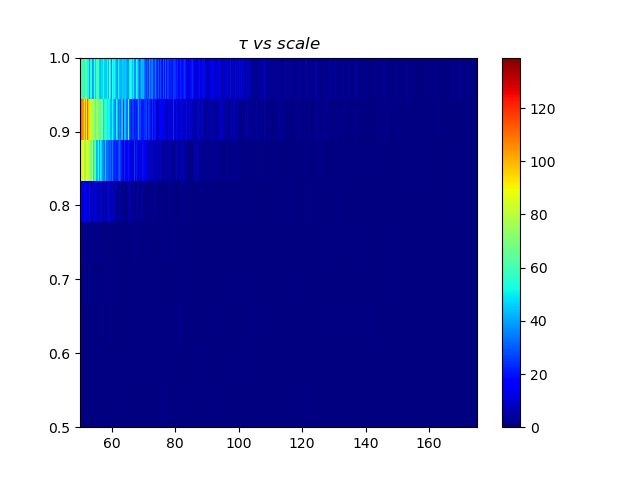

In [43]:
plt.close(14)
plt.figure(14)
plt.hist2d(param_dict[ch_x]['tau'], param_dict[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\tau \ vs \ scale $');

## 4.3. <a id='toc4_3_'></a>[ch0](#toc0_)

In [ ]:
ch_x = ch_str_ls[0]

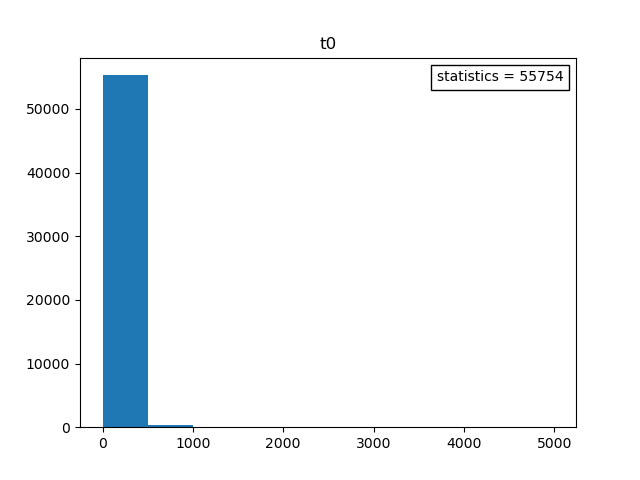

In [44]:
plt.close(15)
plt.figure(15)
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['t0'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.hist(param_dict[ch_x]['t0'])
plt.title('t0')
plt.show()

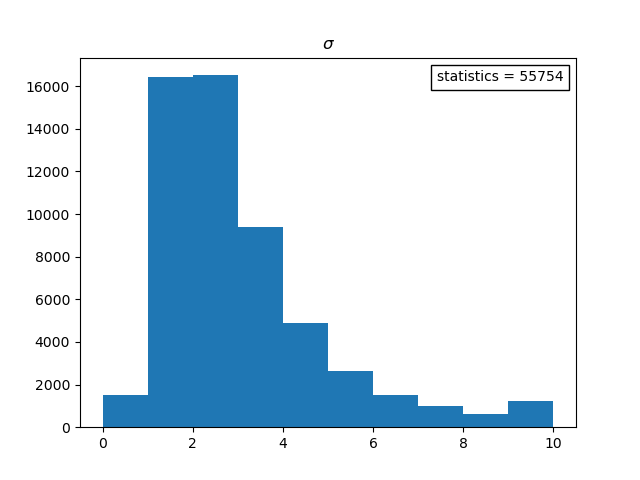

In [45]:
plt.close(16)
plt.figure(16)
plt.hist(param_dict[ch_x]['sigma']) #, bins= np.linspace(1.0, 6.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['sigma'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\sigma$')
plt.show()

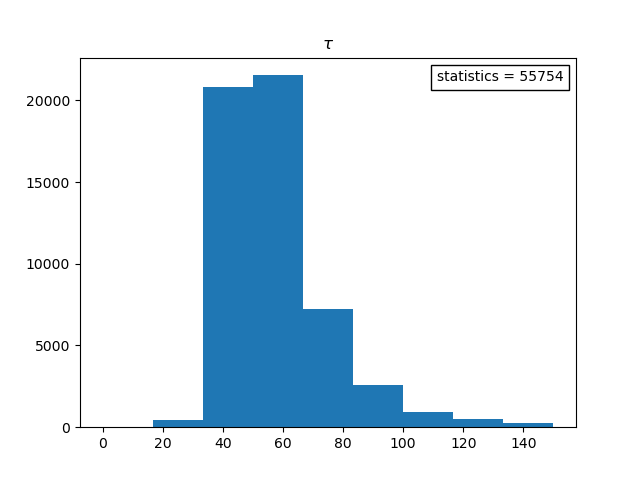

In [46]:
plt.close(17)
plt.figure(17)
plt.hist(param_dict[ch_x]['tau'], bins= np.linspace(0.0, 150.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['tau'])}", \
                                       loc='upper right')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('$\\tau$')
plt.show()

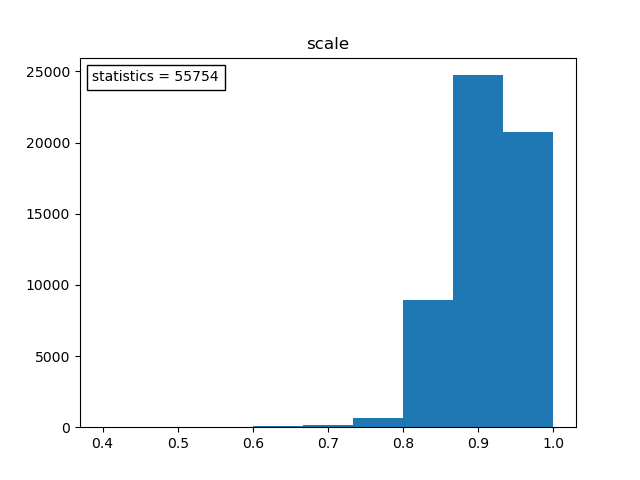

In [47]:
plt.close(18)
plt.figure(18)
plt.hist(param_dict[ch_x]['scale'], bins= np.linspace(0.4, 1.0, 10))
text_in_box = AnchoredText(f"statistics = {len(param_dict[ch_x]['scale'])}", \
                                       loc='upper left')
ax = plt.gca()
ax.add_artist(text_in_box)
plt.title('scale')
plt.show()

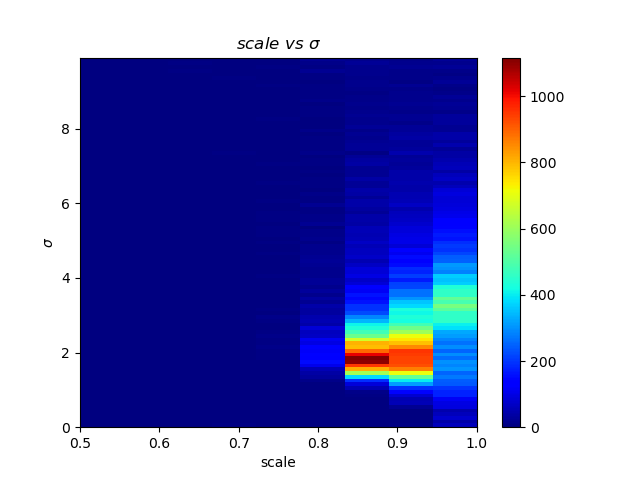

In [48]:
plt.close(19)
plt.figure(19)
plt.hist2d(param_dict[ch_x]['scale'], param_dict[ch_x]['sigma'], bins = [np.linspace(0.5, 1.0, 10), np.arange(0., 10., 0.10)], cmap='jet')
plt.xlabel('scale')
plt.ylabel('$\sigma$')
plt.colorbar()
plt.title('$scale\ vs \ \\sigma$');

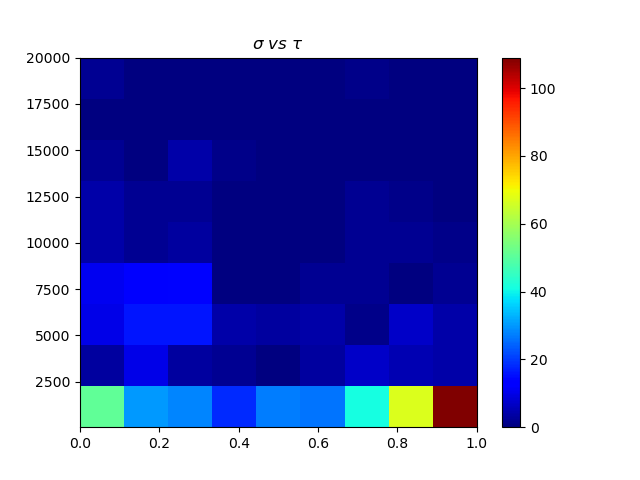

In [49]:
plt.close(20)
plt.figure(20)
plt.hist2d(param_dict[ch_x]['sigma'], param_dict[ch_x]['tau'], bins = [np.linspace(0.0, 1.0, 10), np.linspace(50e0, 20e3, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\sigma \ vs \ \\tau $');

/tmp/ipykernel_3858679/4193961404.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(21)


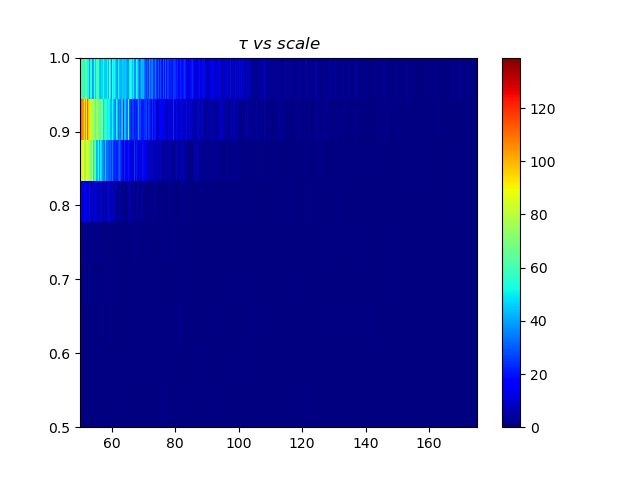

In [50]:
plt.close(21)
plt.figure(21)
plt.hist2d(param_dict[ch_x]['tau'], param_dict[ch_x]['scale'], bins = [np.linspace(50, 175, 1000), np.linspace(0.5, 1.0, 10)] , cmap='jet')
plt.colorbar()
plt.title('$\\tau \ vs \ scale $');

<hr> </hr>